# Estudo do Curso de Ciências e Tecnologia

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
from pandas.plotting import parallel_coordinates
%matplotlib inline 

### Importando tabelas de 2010 a 2016

In [52]:
df_matriculas = pd.DataFrame()

# importando notas de 2010 a 2017
for i in range(10,18):
    for j in range(1,3):
        print('20'+str(i)+str(j))
        df_matricula = pd.read_csv('data_science/matriculas/matriculas-de-20'+str(i)+str(j)+'.csv',sep=';')
        #concatena as tabelas de 2010 a 2017
        df_matriculas = pd.concat([df_matriculas, df_matricula])

# obtendo o id do curso de ciências e tecnologia
df_cursos = pd.read_csv('data_science/cursos-graduacao.csv', sep=';')
id_cet = df_cursos[df_cursos.nome == 'CIÊNCIAS E TECNOLOGIA'].id_curso
id_cet

20101
20102
20111
20112
20121
20122
20131
20132
20141
20142
20151
20152
20161
20162
20171
20172


17    10320810
Name: id_curso, dtype: int64

In [53]:
df_matriculas.columns

Index(['Unnamed: 10', 'descricao', 'discente', 'faltas_unidade', 'id_curso',
       'id_turma', 'media_final', 'nota', 'numero_total_faltas', 'reposicao',
       'unidade'],
      dtype='object')

In [54]:
df_matriculas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10107752 entries, 0 to 501512
Data columns (total 11 columns):
Unnamed: 10            float64
descricao              object
discente               object
faltas_unidade         float64
id_curso               float64
id_turma               int64
media_final            float64
nota                   float64
numero_total_faltas    float64
reposicao              object
unidade                float64
dtypes: float64(7), int64(1), object(3)
memory usage: 925.4+ MB


### Filtrando apenas dados de CeT

In [5]:
# TESTE - outra maneira de filtrar alunos de CeT
#teste = pd.merge(df_matriculas, df_cursos, on='id_curso', how='left')
#teste = teste[teste["nome"] == "CIÊNCIAS E TECNOLOGIA"]
#columns = ['descricao', 'discente', 'faltas_unidade', 'id_curso', 'id_turma', 'media_final', 'nota', 'numero_total_faltas', 'reposicao', 'unidade']
#teste[columns].shape

In [55]:
# filtra tabela pelo id_curso
df_matriculas = df_matriculas[df_matriculas.id_curso == float(id_cet)]

columns = ['descricao', 'discente', 'faltas_unidade', 'id_curso', 'id_turma', 'media_final', 'nota', 'numero_total_faltas', 'reposicao', 'unidade']
df_matriculas = df_matriculas[columns]

df_matriculas.shape

(904629, 10)

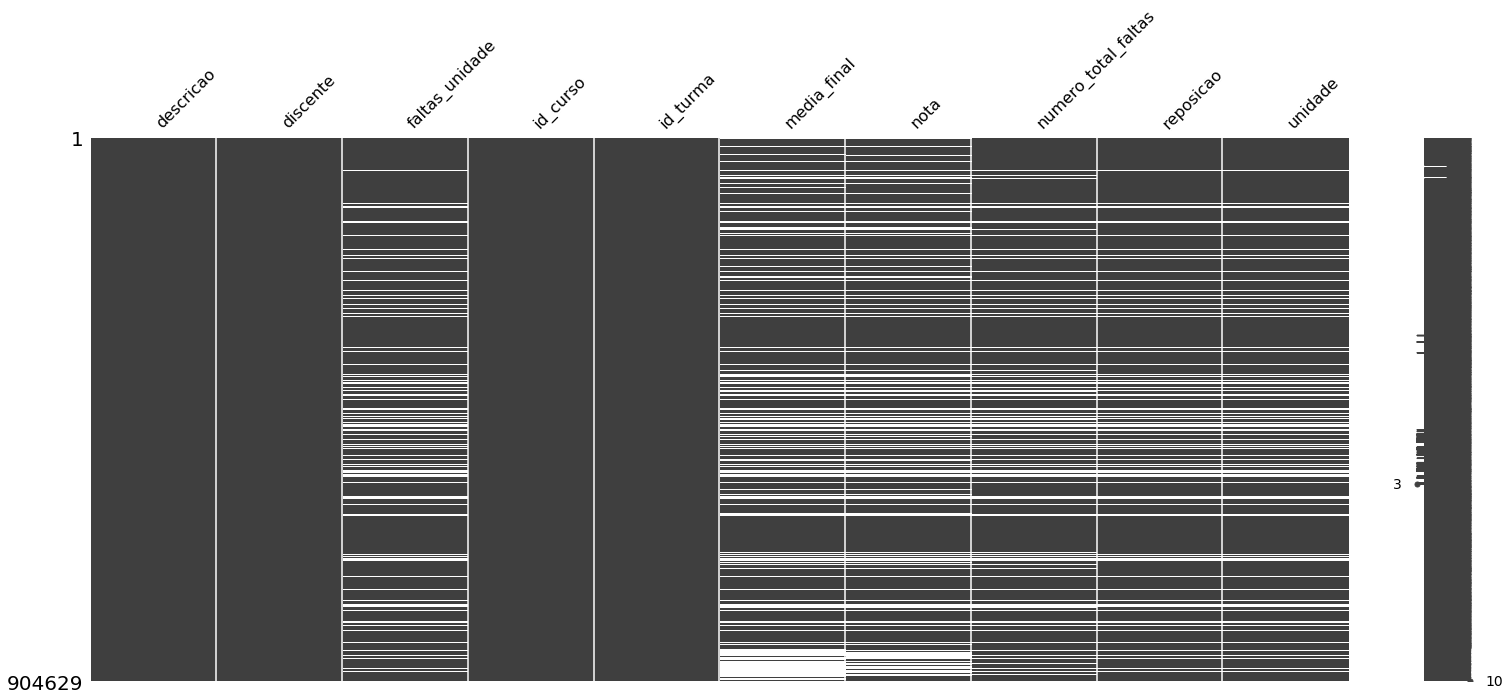

In [56]:
#exibindo consistencias dos dados
msno.matrix(df_matriculas)

In [57]:
campos_NaN = pd.isnull(df_matriculas).sum()
campos_NaN

descricao                   0
discente                  479
faltas_unidade         143924
id_curso                    0
id_turma                    0
media_final            231360
nota                   213075
numero_total_faltas    163198
reposicao              143924
unidade                143924
dtype: int64

### Visão geral de aprovações e reprovações:

In [58]:
df_matriculas.descricao.value_counts()

APROVADO                            271086
REPROVADO                           159036
APROVADO POR NOTA                   141004
CANCELADO                            73047
INDEFERIDO                           69540
EXCLUIDA                             51109
MATRICULADO                          46715
REPROVADO POR MÉDIA E POR FALTAS     45332
TRANCADO                             35131
DESISTENCIA                          10030
REPROVADO POR FALTAS                  1372
REPROVADO POR NOTA                     973
REPROVADO POR NOTA E FALTA             112
DISPENSADO                             111
CUMPRIU                                 20
TRANSFERIDO                              9
EM ESPERA                                2
Name: descricao, dtype: int64

In [10]:
# tratando NaN
# Eliminando data missing
# df_matriculas = df_matriculas.dropna()

### Verificando NaN

In [59]:
campos_NaN

descricao                   0
discente                  479
faltas_unidade         143924
id_curso                    0
id_turma                    0
media_final            231360
nota                   213075
numero_total_faltas    163198
reposicao              143924
unidade                143924
dtype: int64

In [60]:
# discentes
print("Ocorrências do NaN na coluna discente:")
display(df_matriculas[df_matriculas.discente.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
df_matriculas[df_matriculas.discente.isnull()].descricao.value_counts()

Ocorrências do NaN na coluna discente:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
33852,CANCELADO,NaN,NaN,10320810.0,1220144,NaN,NaN,NaN,NaN,NaN
34120,CANCELADO,NaN,0.0,10320810.0,1220094,NaN,NaN,NaN,f,1.0


Quais as descrições que isso ocorre?


CANCELADO      418
TRANCADO        29
EXCLUIDA        25
DESISTENCIA      7
Name: descricao, dtype: int64

In [61]:
print("Ocorrências do NaN na coluna faltas_unidade:")
display(df_matriculas[df_matriculas.faltas_unidade.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
df_matriculas[df_matriculas.faltas_unidade.isnull()].descricao.value_counts()

Ocorrências do NaN na coluna faltas_unidade:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
5655,DESISTENCIA,31b8b16c0b441731129c58db0badef70,NaN,10320810.0,57549427,NaN,NaN,NaN,NaN,NaN
68315,INDEFERIDO,8c32925c02a64ab7fd576f4d86a16d7a,NaN,10320810.0,57548380,NaN,NaN,NaN,NaN,NaN


Quais as descrições que isso ocorre?


INDEFERIDO     66148
EXCLUIDA       48227
CANCELADO      10049
DESISTENCIA     8941
TRANCADO        7591
MATRICULADO     2952
CUMPRIU           12
TRANSFERIDO        2
EM ESPERA          2
Name: descricao, dtype: int64

In [62]:
# media_final
print("Ocorrências do NaN na coluna media_final:")
display(df_matriculas[df_matriculas.media_final.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
series_semMediaFinal = df_matriculas[df_matriculas.media_final.isnull()].descricao.value_counts()
series_semMediaFinal.axes

Ocorrências do NaN na coluna media_final:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
5655,DESISTENCIA,31b8b16c0b441731129c58db0badef70,NaN,10320810.0,57549427,NaN,NaN,NaN,NaN,NaN
68315,INDEFERIDO,8c32925c02a64ab7fd576f4d86a16d7a,NaN,10320810.0,57548380,NaN,NaN,NaN,NaN,NaN


Quais as descrições que isso ocorre?


[Index(['INDEFERIDO', 'EXCLUIDA', 'MATRICULADO', 'TRANCADO', 'CANCELADO',
        'DESISTENCIA', 'DISPENSADO', 'CUMPRIU', 'TRANSFERIDO', 'EM ESPERA',
        'REPROVADO'],
       dtype='object')]

In [63]:
# nota
print("Ocorrências do NaN na coluna nota:")
display(df_matriculas[df_matriculas.nota.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
df_matriculas[df_matriculas.nota.isnull()].descricao.value_counts()

Ocorrências do NaN na coluna nota:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
5655,DESISTENCIA,31b8b16c0b441731129c58db0badef70,NaN,10320810.0,57549427,NaN,NaN,NaN,NaN,NaN
68315,INDEFERIDO,8c32925c02a64ab7fd576f4d86a16d7a,NaN,10320810.0,57548380,NaN,NaN,NaN,NaN,NaN


Quais as descrições que isso ocorre?


INDEFERIDO                          69454
EXCLUIDA                            50276
MATRICULADO                         27823
CANCELADO                           26616
TRANCADO                            26481
DESISTENCIA                          9978
APROVADO POR NOTA                     837
APROVADO                              795
REPROVADO                             444
REPROVADO POR MÉDIA E POR FALTAS      238
DISPENSADO                            105
CUMPRIU                                16
TRANSFERIDO                             8
EM ESPERA                               2
REPROVADO POR NOTA                      1
REPROVADO POR FALTAS                    1
Name: descricao, dtype: int64

In [64]:
# numero_total_faltas
print("Ocorrências do NaN na coluna numero_total_faltas:")
display(df_matriculas[df_matriculas.numero_total_faltas.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
df_matriculas[df_matriculas.numero_total_faltas.isnull()].descricao.value_counts()

Ocorrências do NaN na coluna numero_total_faltas:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
5655,DESISTENCIA,31b8b16c0b441731129c58db0badef70,NaN,10320810.0,57549427,NaN,NaN,NaN,NaN,NaN
68315,INDEFERIDO,8c32925c02a64ab7fd576f4d86a16d7a,NaN,10320810.0,57548380,NaN,NaN,NaN,NaN,NaN


Quais as descrições que isso ocorre?


INDEFERIDO     68596
EXCLUIDA       49039
CANCELADO      15893
TRANCADO       15363
DESISTENCIA     9633
MATRICULADO     4542
DISPENSADO       102
CUMPRIU           14
TRANSFERIDO        6
APROVADO           6
REPROVADO          2
EM ESPERA          2
Name: descricao, dtype: int64

In [65]:
# reposicao
print("Ocorrências do NaN na coluna reposicao:")
display(df_matriculas[df_matriculas.reposicao.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
df_matriculas[df_matriculas.reposicao.isnull()].descricao.value_counts()

Ocorrências do NaN na coluna reposicao:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
5655,DESISTENCIA,31b8b16c0b441731129c58db0badef70,NaN,10320810.0,57549427,NaN,NaN,NaN,NaN,NaN
68315,INDEFERIDO,8c32925c02a64ab7fd576f4d86a16d7a,NaN,10320810.0,57548380,NaN,NaN,NaN,NaN,NaN


Quais as descrições que isso ocorre?


INDEFERIDO     66148
EXCLUIDA       48227
CANCELADO      10049
DESISTENCIA     8941
TRANCADO        7591
MATRICULADO     2952
CUMPRIU           12
TRANSFERIDO        2
EM ESPERA          2
Name: descricao, dtype: int64

In [66]:
# unidade
print("Ocorrências do NaN na coluna unidade:")
display(df_matriculas[df_matriculas.unidade.isnull()].head(2))

print("Quais as descrições que isso ocorre?")
df_matriculas[df_matriculas.unidade.isnull()].descricao.value_counts()

Ocorrências do NaN na coluna unidade:


,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
5655,DESISTENCIA,31b8b16c0b441731129c58db0badef70,NaN,10320810.0,57549427,NaN,NaN,NaN,NaN,NaN
68315,INDEFERIDO,8c32925c02a64ab7fd576f4d86a16d7a,NaN,10320810.0,57548380,NaN,NaN,NaN,NaN,NaN


Quais as descrições que isso ocorre?


INDEFERIDO     66148
EXCLUIDA       48227
CANCELADO      10049
DESISTENCIA     8941
TRANCADO        7591
MATRICULADO     2952
CUMPRIU           12
TRANSFERIDO        2
EM ESPERA          2
Name: descricao, dtype: int64

### Quais campos podem ser excluídos?

In [67]:
print(df_matriculas[df_matriculas['descricao'] == 'CANCELADO'].shape)
df_matriculas[df_matriculas.media_final.isnull()].descricao.value_counts()

(73047, 10)


INDEFERIDO     68616
EXCLUIDA       50683
MATRICULADO    40643
TRANCADO       30938
CANCELADO      30545
DESISTENCIA     9791
DISPENSADO       111
CUMPRIU           20
TRANSFERIDO        9
EM ESPERA          2
REPROVADO          2
Name: descricao, dtype: int64

In [68]:
excluir = ['MATRICULADO', 'EM ESPERA', 'INDEFERIDO', 'CUMPRIU', 'DESISTENCIA', 'TRANCADO', 'TRANSFERIDO', 'CANCELADO', 'EXCLUIDA']

### Por disciplinas

In [69]:
df_turmas = pd.DataFrame()

# concatenar todas as turmas de 2010 a 2017
for i in range(10,18):
    for j in range(1,3):
        print('20'+str(i)+str(j))
        df_turma = pd.read_csv('data_science/turmas-teste/turma-20'+str(i)+str(j)+'.csv',sep=',')
        df_turmas = pd.concat([df_turmas, df_turma])

# filtra disciplinas da graduação
df_turmas = df_turmas[df_turmas['nivel_ensino'] == 'GRADUAÇÃO']

# colunas importantes
columns_1 = ['id_turma', 'nome_ascii', 'id_docente_interno', 'ano', 'periodo',
             'codigo_turma', 'descricao_horario', 'id_componente_curricular']
df_turmas = df_turmas[columns_1]

display(df_turmas.head(3))
df_turmas.info()

20101
20102
20111
20112
20121
20122
20131
20132


/home/andreza/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20141
20142
20151


/home/andreza/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20152


/home/andreza/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20161
20162


/home/andreza/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


20171
20172


,id_turma,nome_ascii,id_docente_interno,ano,periodo,codigo_turma,descricao_horario,id_componente_curricular
0,1151160,SIMULACAO,25852.0,2010.0,1.0,01,35T12,24054.0
1,1151161,ESTRATEGIA DE PRODUCAO,5753006.0,2010.0,1.0,01,6T56 5N34,24061.0
2,1151162,PLANEJAMENTO DO ARRANJO FISICO,5753423.0,2010.0,1.0,01,35N34,25843.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 678611 entries, 0 to 63009
Data columns (total 8 columns):
id_turma                    678611 non-null int64
nome_ascii                  678587 non-null object
id_docente_interno          675899 non-null float64
ano                         678611 non-null float64
periodo                     678611 non-null float64
codigo_turma                678574 non-null object
descricao_horario           610517 non-null object
id_componente_curricular    678611 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 46.6+ MB


In [70]:
# teste
df_turmas[df_turmas.id_turma==1155176]

,id_turma,nome_ascii,id_docente_interno,ano,periodo,codigo_turma,descricao_horario,id_componente_curricular
13399,1155176,CALCULO II,5753037.0,2010.0,2.0,03,"6N12 (11/10/2010 - 17/10/2010), 23456N12 (18/...",2051052.0


In [71]:
# merge df_matriculas and df_turmas
df_matTurm = pd.merge(df_matriculas, df_turmas, on='id_turma', how='left')

In [72]:
df_matTurm.columns

Index(['descricao', 'discente', 'faltas_unidade', 'id_curso', 'id_turma',
       'media_final', 'nota', 'numero_total_faltas', 'reposicao', 'unidade',
       'nome_ascii', 'id_docente_interno', 'ano', 'periodo', 'codigo_turma',
       'descricao_horario', 'id_componente_curricular'],
      dtype='object')

In [73]:
df_matTurm.descricao.unique()

array(['DESISTENCIA', 'APROVADO', 'INDEFERIDO', 'TRANCADO', 'REPROVADO',
       'REPROVADO POR FALTAS', 'CANCELADO', 'EXCLUIDA',
       'REPROVADO POR MÉDIA E POR FALTAS', 'DISPENSADO', 'CUMPRIU',
       'TRANSFERIDO', 'APROVADO POR NOTA', 'REPROVADO POR NOTA',
       'REPROVADO POR NOTA E FALTA', 'EM ESPERA', 'MATRICULADO'],
      dtype=object)

In [74]:
df_matTurm[df_matTurm['descricao'].str.contains('REPROVADO')]['media_final'].isnull().sum()

2

In [75]:
teste = df_matTurm[df_matTurm['descricao'].str.contains('REPROVADO')]
teste[teste.media_final.isnull()]

,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade,nome_ascii,id_docente_interno,ano,periodo,codigo_turma,descricao_horario,id_componente_curricular
497271,REPROVADO,f1b1ae81b71aad5a4b152dc76ae3e40c,0.0,10320810.0,1183158,NaN,NaN,NaN,f,1.0,ALGEBRA LINEAR,5752737.0,2012.0,1.0,05,"356N12 (13/02/2012 - 22/04/2012), 35N12 (23/0...",48583.0
497272,REPROVADO,f1b1ae81b71aad5a4b152dc76ae3e40c,0.0,10320810.0,1183158,NaN,NaN,NaN,f,2.0,ALGEBRA LINEAR,5752737.0,2012.0,1.0,05,"356N12 (13/02/2012 - 22/04/2012), 35N12 (23/0...",48583.0


In [76]:
# Contando reprovações de media_final notnull
df_contagemRep = df_matTurm[df_matTurm['descricao'].str.contains('REPROVADO')]
df_contagemRep = df_contagemRep[df_contagemRep.media_final.notnull()]

colunas_1 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome_ascii']

df_contagemRep = df_contagemRep[colunas_1].drop_duplicates()

# df_contagemRep[df_contagemRep.discente=='f3895ff9fc386821a519db524a8aeaac']
df_contagemRep = df_contagemRep[df_contagemRep['nome_ascii'].isin(['CALCULO I', 'CALCULO II', 'CALCULO III'])]
df_contagemRep=df_contagemRep.groupby(['discente']).descricao.count().reset_index()
df_contagemRep.sort_values('descricao', ascending=False).head()

,discente,descricao
3094,8f405a611880fe526269d256f32d7742,9
823,246bcca179aa14684794d6d7ea146f59,9
2928,87709f1fc9bd6c1720262a313001940a,9
1474,4384474a65b5478cd26e0f875fbea185,9
5210,ec4c137c798d23f154c8e6afc422dc41,9


In [77]:
# teste
teste_2 = df_matTurm[df_matTurm['nome_ascii'].isin(['CALCULO I', 'CALCULO II', 'CALCULO III'])]
colunas_1 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome_ascii']
teste_2 = teste_2[colunas_1].drop_duplicates()
teste_2[teste_2['discente'] == '008d1240afa6f2cb235d1c237476a99f']

,descricao,discente,media_final,id_turma,nome_ascii
2064340,APROVADO,008d1240afa6f2cb235d1c237476a99f,9.6,57595047,CALCULO I


In [78]:
# Aprovados e não foram reprovados
series_Rep = df_contagemRep['discente']

df_NRep = df_matTurm[df_matTurm['descricao'].str.contains('APROVADO')]

# tirando os reprovados
df_NRep = df_NRep[~df_NRep['discente'].isin(series_Rep)]
df_NRep = df_NRep[df_NRep.media_final.notnull()]

colunas_1 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome_ascii']
df_NRep = df_NRep[colunas_1].drop_duplicates()
df_NRep = df_NRep[df_NRep['nome_ascii'].isin(['CALCULO I', 'CALCULO II', 'CALCULO III'])]
df_NRep.head()
# df_NRep.groupby(['discente']).descricao.count().reset_index()
# df_conta_NRep.head()

,descricao,discente,media_final,id_turma,nome_ascii
1134,APROVADO,fde0c6b53517977fc5adecbb4b04c214,7.1,57547072,CALCULO II
1140,APROVADO,9db0326ad0da352a7a90e36e8e4a7b05,6.4,57547072,CALCULO II
1143,APROVADO,b7a234df6b0a886d29be408835485a1d,9.3,57547072,CALCULO II
1145,APROVADO,3a355a35e9b26029085902abeb46babb,6.3,57547072,CALCULO II
1156,APROVADO,4f8e1ab63c92a6fab96bf39cf59e2956,6.9,57547072,CALCULO II


In [79]:
# junta APROVADOS e REPROVADOS
aprovados = pd.DataFrame();
aprovados['discente'] = df_NRep['discente'];
aprovados['descricao'] = df_NRep['descricao'];

aprovados = aprovados.replace('APROVADO', 0)
aprovados = aprovados.replace('APROVADO POR NOTA', 0)

df_contagem = pd.concat([df_contagemRep, aprovados])

In [80]:
colunas_1 = ['descricao', 'discente', 'media_final', 'id_turma', 'nome_ascii', 'ano','periodo']
notas2 = df_matTurm[colunas_1].drop_duplicates().dropna()
notas2=notas2[['discente','media_final','nome_ascii']]
notas2=notas2[notas2['nome_ascii']=='CALCULO II']
def fx(df):
    df['nome_ascii'] = df['nome_ascii']+' '+((df['nome_ascii'] == 'CALCULO II').cumsum()).astype(str)
    return df
notas2=notas2.groupby('discente').apply(fx)

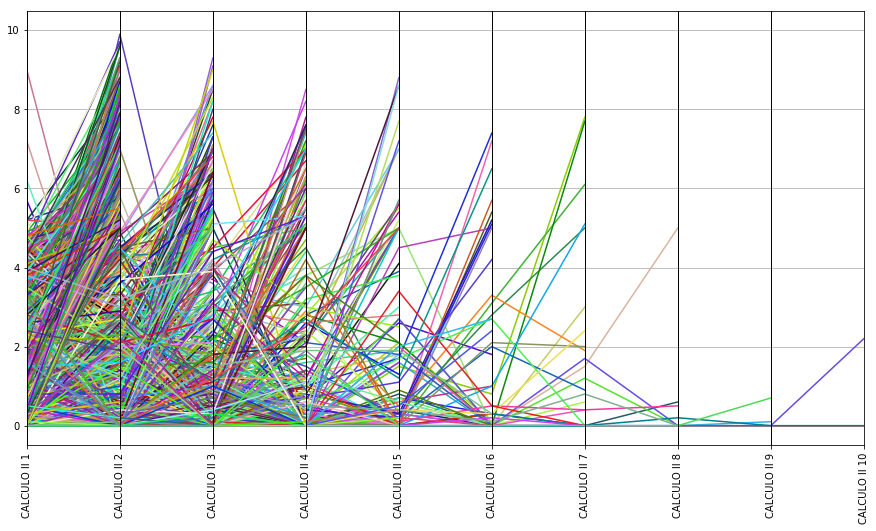

In [81]:
plt.figure(figsize=(15,8))
notas3 = pd.crosstab(notas2.discente,notas2.nome_ascii,notas2.media_final,aggfunc=np.mean)
notas3= notas3[['CALCULO II {}'.format(c) for c in range(1,11)]].reset_index()
eixo = plt.gca()
parallel_coordinates(frame=notas3, class_column='discente',ax=eixo)
plt.xticks(rotation=90)
eixo.legend_.remove()
# plotar as curvas de acordo com o numero de tentativas

In [82]:
colunas = ['discente', 'nome_ascii', 'media_final']
# tirando duplicados e NaN
grafico = df_matTurm[colunas].drop_duplicates().dropna()
grafico.head()
#grafico[grafico.discente=='0005a138027eba573d7f9894f5721188']

,discente,nome_ascii,media_final
1,d4245b974fc45e2ef383af9c74d4aa89,LINGUA INGLESA IX,9.0
5,747fc6ff3db5cc48b86765c3372219e9,TOPICOS ESPECIAIS EM COMPUTACAO XIV,8.6
341,c0c470cff29c9aebfbdb85877fb20ecf,GEOLOGIA GERAL,5.0
368,7e49a6fc37be113a88801e922ba4e7e2,ALGEBRA LINEAR,1.7
371,9ce50bad7b6b0746a8c50e7319d91398,FUNDAMENTOS DE MATEMATICA,7.0


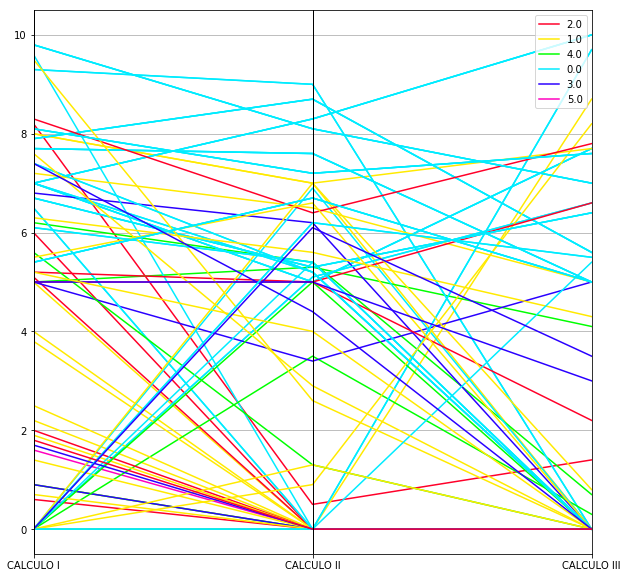

In [83]:
materias = ['CALCULO I', 'CALCULO II', 'CALCULO III']
grafico = grafico[grafico['nome_ascii'].isin(materias)]

df_grafico = pd.crosstab(grafico.discente,grafico.nome_ascii,grafico.media_final,aggfunc=np.max).reset_index()
df_grafico.head()
df_grafico = pd.merge(df_grafico, df_contagem, on='discente',how='left')

df_grafico= df_grafico.fillna(0)
#eixo = plt.gca()
plt.figure(figsize=(10,10))
df_grafico= df_grafico[['CALCULO I', 'CALCULO II', 'CALCULO III', 'descricao']]
parallel_coordinates(frame=df_grafico.head(100), class_column='descricao',colormap='gist_rainbow')
#eixo.legend_.remove()

# ALGUNS GRÁFICOS ESTÃO COM OS PERÍODOS (?)

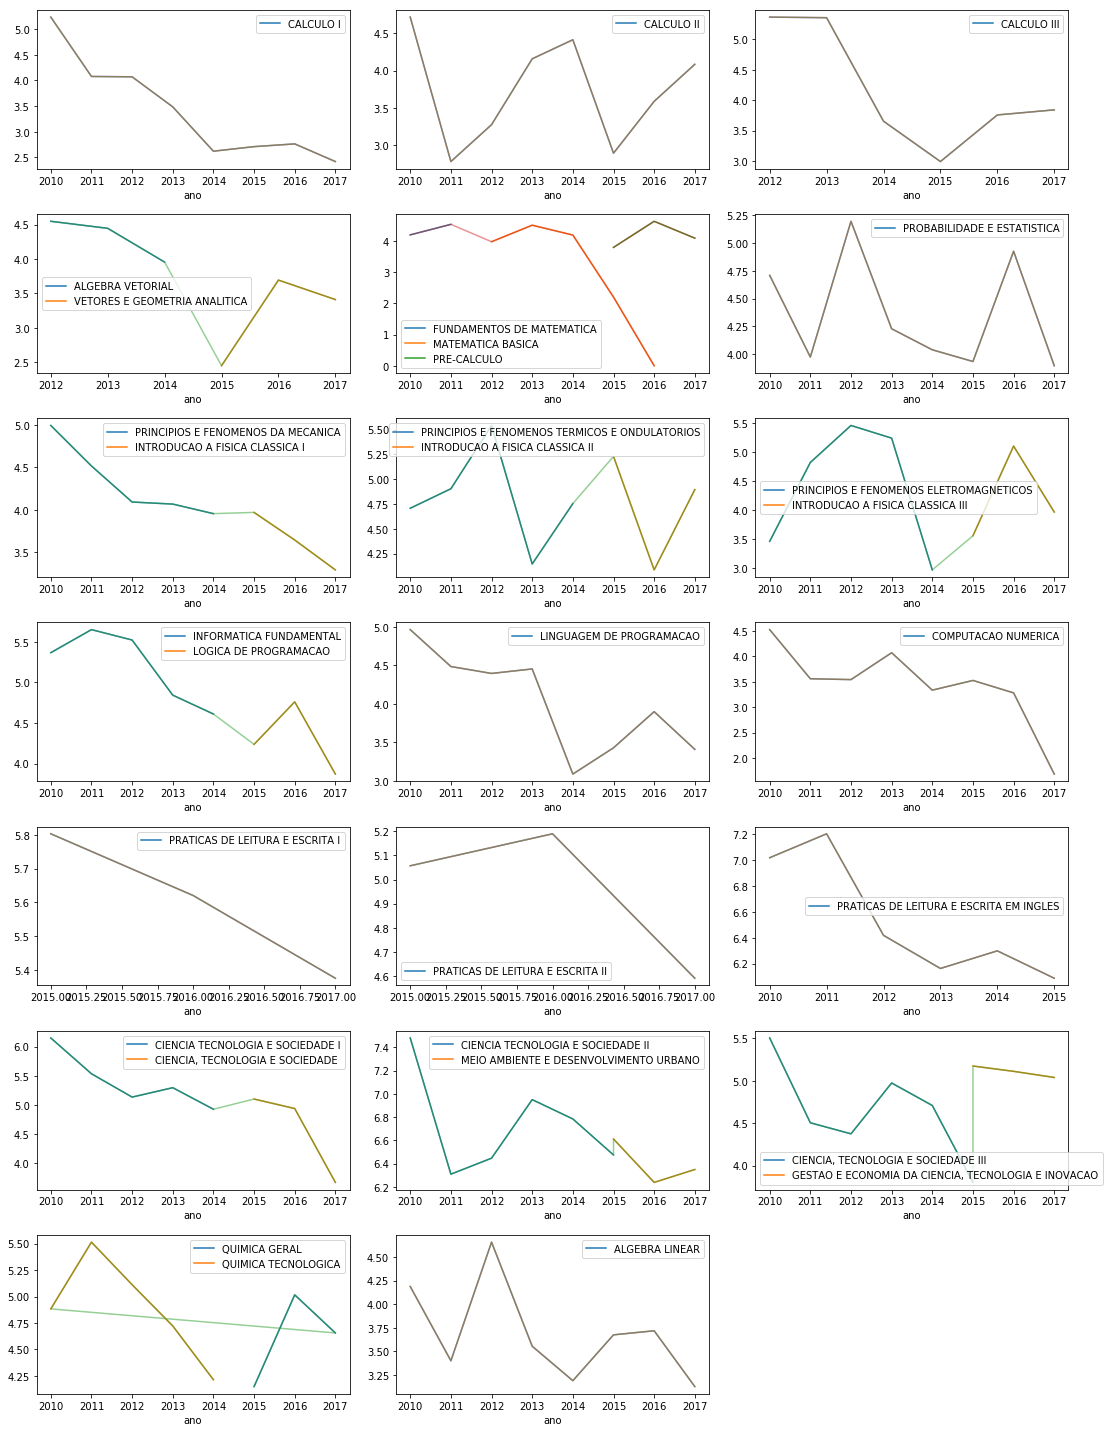

In [87]:
# var series_semMediaFinal -> descrições em que os discentes não possuem Media_Final

disciplinas = [['CALCULO I'], ['CALCULO II'], ['CALCULO III'],
              ['ALGEBRA VETORIAL','VETORES E GEOMETRIA ANALITICA'],
              ['FUNDAMENTOS DE MATEMATICA','MATEMATICA BASICA','PRE-CALCULO'],
              ['PROBABILIDADE E ESTATISTICA'],
              ['PRINCIPIOS E FENOMENOS DA MECANICA','INTRODUCAO A FISICA CLASSICA I'],
              ['PRINCIPIOS E FENOMENOS TERMICOS E ONDULATORIOS', 'INTRODUCAO A FISICA CLASSICA II'],
              ['PRINCIPIOS E FENOMENOS ELETROMAGNETICOS', 'INTRODUCAO A FISICA CLASSICA III'],
              ['INFORMATICA FUNDAMENTAL', 'LOGICA DE PROGRAMACAO'],
              ['LINGUAGEM DE PROGRAMACAO'], ['COMPUTACAO NUMERICA'],
              ['PRATICAS DE LEITURA E ESCRITA I'], ['PRATICAS DE LEITURA E ESCRITA II'],
              ['PRATICAS DE LEITURA E ESCRITA EM INGLES'], ['CIENCIA TECNOLOGIA E SOCIEDADE I', 'CIENCIA, TECNOLOGIA E SOCIEDADE'],
              ['CIENCIA TECNOLOGIA E SOCIEDADE II', 'MEIO AMBIENTE E DESENVOLVIMENTO URBANO'],
              ['CIENCIA, TECNOLOGIA E SOCIEDADE III', 'GESTAO E ECONOMIA DA CIENCIA, TECNOLOGIA E INOVACAO'],
              ['QUIMICA GERAL', 'QUIMICA TECNOLOGICA'], ['ALGEBRA LINEAR']
             ]

cont= 1
plt.ion()
fig= plt.figure(figsize=(15,20))
for d in disciplinas:
    fig.add_subplot(7,3,cont)
    cont+=1
    lx= []
    ly= []
    for r in d:
#        a=df_matTurm[df_matTurm.nome_ascii==r].groupby('ano').descricao.value_counts()
        a=df_matTurm[df_matTurm.nome_ascii==r].groupby('ano').media_final.mean()
        ly.extend(a.values)
        lx.extend(list(a.keys()))
        a.plot(label=r)
        plt.legend()
    plt.plot(lx,ly, alpha=0.5)
plt.tight_layout()
plt.savefig('notas.png')
plt.show()

#### Médias das matérias

In [88]:
lista_disciplinas = ['CALCULO I', 'CALCULO II', 'CALCULO III', 'ALGEBRA VETORIAL','VETORES E GEOMETRIA ANALITICA',
              'FUNDAMENTOS DE MATEMATICA','MATEMATICA BASICA','PRE-CALCULO', 'PROBABILIDADE E ESTATISTICA',
              'PRINCIPIOS E FENOMENOS DA MECANICA','INTRODUCAO A FISICA CLASSICA I',
              'PRINCIPIOS E FENOMENOS TERMICOS E ONDULATORIOS', 'INTRODUCAO A FISICA CLASSICA II',
              'PRINCIPIOS E FENOMENOS ELETROMAGNETICOS', 'INTRODUCAO A FISICA CLASSICA III',
              'INFORMATICA FUNDAMENTAL', 'LOGICA DE PROGRAMACAO', 'LINGUAGEM DE PROGRAMACAO', 'COMPUTACAO NUMERICA',
              'PRATICAS DE LEITURA E ESCRITA I', 'PRATICAS DE LEITURA E ESCRITA II',
              'PRATICAS DE LEITURA E ESCRITA EM INGLES', 'CIENCIA TECNOLOGIA E SOCIEDADE I', 'CIENCIA, TECNOLOGIA E SOCIEDADE',
              'CIENCIA TECNOLOGIA E SOCIEDADE II', 'MEIO AMBIENTE E DESENVOLVIMENTO URBANO',
              'CIENCIA, TECNOLOGIA E SOCIEDADE III', 'GESTAO E ECONOMIA DA CIENCIA, TECNOLOGIA E INOVACAO',
              'QUIMICA GERAL', 'QUIMICA TECNOLOGICA', 'ALGEBRA LINEAR']

In [89]:
df_listaDisc = df_matTurm[df_matTurm.nome_ascii.isin(lista_disciplinas)]

In [90]:
medias = pd.DataFrame(df_listaDisc.groupby('nome_ascii').media_final.mean())
medias.sort_values('media_final')

,media_final
nome_ascii,
VETORES E GEOMETRIA ANALITICA,3.269671
COMPUTACAO NUMERICA,3.419202
LINGUAGEM DE PROGRAMACAO,3.514926
CALCULO I,3.595627
ALGEBRA LINEAR,3.630722
INTRODUCAO A FISICA CLASSICA I,3.727424
CALCULO III,3.879980
CALCULO II,3.962584
PRINCIPIOS E FENOMENOS DA MECANICA,4.061502


#### Médias de faltas em cada disciplina por ano e no total

In [91]:
faltas_porano = pd.DataFrame(df_listaDisc.groupby(['nome_ascii','ano']).numero_total_faltas.mean())
faltas_porano.head()

numero_total_faltas
nome_ascii     ano                        
ALGEBRA LINEAR 2010.0             2.116212
               2011.0             5.383275
               2012.0             3.702322
               2013.0             7.824735
               2014.0             2.802143

In [92]:
faltas_unidade = pd.DataFrame(df_listaDisc.groupby('nome_ascii').numero_total_faltas.mean())
faltas_unidade

,numero_total_faltas
nome_ascii,
ALGEBRA LINEAR,6.899407
ALGEBRA VETORIAL,1.611445
CALCULO I,4.892154
CALCULO II,3.593995
CALCULO III,1.811312
CIENCIA TECNOLOGIA E SOCIEDADE I,1.634338
CIENCIA TECNOLOGIA E SOCIEDADE II,5.863689
"CIENCIA, TECNOLOGIA E SOCIEDADE",5.772798
"CIENCIA, TECNOLOGIA E SOCIEDADE III",0.023004


## Análises das matérias através do ano.período.unidade

In [93]:
# pegando colunas que interessam
colunas = ['discente', 'id_curso', 'id_turma', 'media_final', 'nota', 'unidade', 'nome_ascii', 'ano', 'periodo']

df_data = df_matTurm[colunas]

# tirando NaN
df_data = df_data.dropna(axis=0, how='any')

df_data['unidade'] = df_data.unidade.astype('int')

# novo campo ano.periodo.unidade
df_data["ano_periodo_uni"] = (df_data['ano'].map(str)+'.'+df_data['periodo'].map(str)+'.'+df_data['unidade'].map(str))

df_data.head()

,discente,id_curso,id_turma,media_final,nota,unidade,nome_ascii,ano,periodo,ano_periodo_uni
1,d4245b974fc45e2ef383af9c74d4aa89,10320810.0,57548379,9.0,8.2,1,LINGUA INGLESA IX,2010.0,1.0,2010.0.1.0.1
2,d4245b974fc45e2ef383af9c74d4aa89,10320810.0,57548379,9.0,9.6,2,LINGUA INGLESA IX,2010.0,1.0,2010.0.1.0.2
3,d4245b974fc45e2ef383af9c74d4aa89,10320810.0,57548379,9.0,9.0,3,LINGUA INGLESA IX,2010.0,1.0,2010.0.1.0.3
5,747fc6ff3db5cc48b86765c3372219e9,10320810.0,57549019,8.6,9.0,2,TOPICOS ESPECIAIS EM COMPUTACAO XIV,2010.0,1.0,2010.0.1.0.2
6,747fc6ff3db5cc48b86765c3372219e9,10320810.0,57549019,8.6,9.0,2,TOPICOS ESPECIAIS EM COMPUTACAO XIV,2010.0,1.0,2010.0.1.0.2


In [94]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670065 entries, 1 to 2309886
Data columns (total 10 columns):
discente           1670065 non-null object
id_curso           1670065 non-null float64
id_turma           1670065 non-null int64
media_final        1670065 non-null float64
nota               1670065 non-null float64
unidade            1670065 non-null int64
nome_ascii         1670065 non-null object
ano                1670065 non-null float64
periodo            1670065 non-null float64
ano_periodo_uni    1670065 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 140.2+ MB


/home/andreza/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


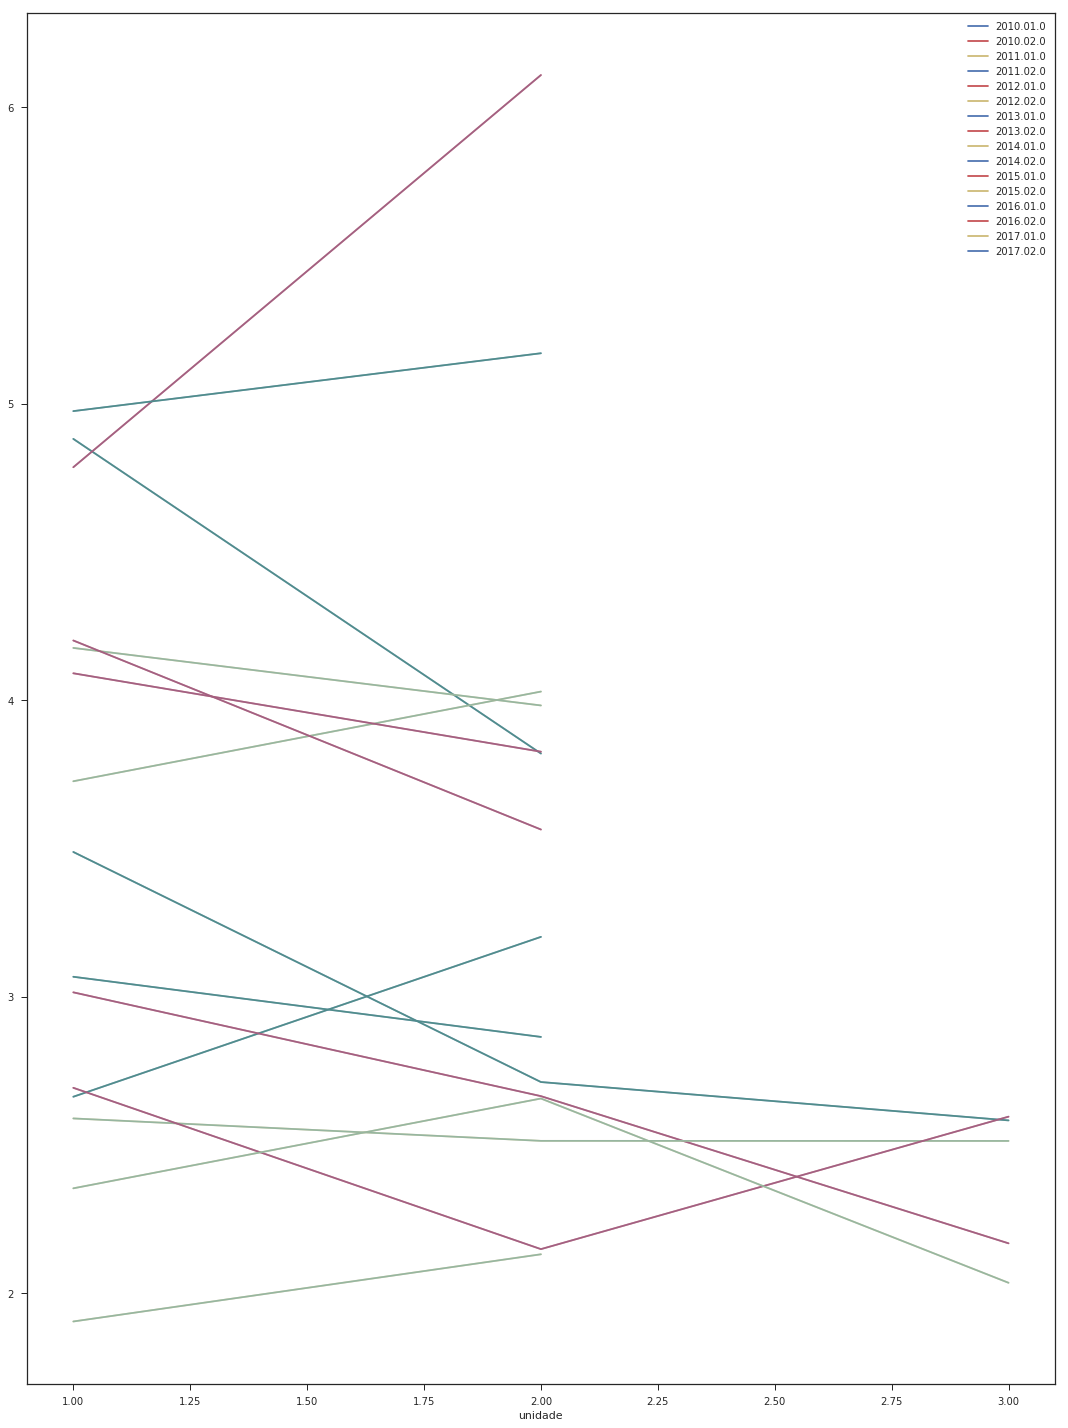

In [95]:
sns.set(style="ticks", color_codes=True)
data = df_matTurm[df_matTurm['nome_ascii'] == 'CALCULO I']


data_medias = pd.DataFrame(df_data.groupby('ano_periodo_uni').nota.mean())
data_medias
# teste = pd.DataFrame(data.groupby(['ano', 'periodo', 'unidade']))
# print(type(teste))
# display(teste)

# g = sns.FacetGrid(data, col="periodo", row="ano")
# g = g.map(plt.hist, "unidade")

retas = (df_matTurm['ano'].map(str)+df_matTurm['periodo'].map(str)).unique()

#pegar só uma materia
materia = df_matTurm[df_matTurm['nome_ascii'] == 'CALCULO I']
materia['anoperiodo'] = (materia['ano'].map(str)+materia['periodo'].map(str))

anoperiodo = materia.anoperiodo.unique()

# linhas = ano.periodo
# x = unidades
# y = quantidades

cont= 1
plt.ion()
fig= plt.figure(figsize=(15,20))
for ap in anoperiodo:
#     fig.add_subplot(7,3,cont)
    cont+=1
    lx= []
    ly= []
    a=materia[materia.anoperiodo==ap].groupby('unidade').nota.mean()
    ly.extend(a.values)
    lx.extend(list(a.keys()))
    a.plot(label=ap)
    plt.legend()
    plt.plot(lx,ly, alpha=0.5)
plt.tight_layout()
plt.savefig('groupbyunidade.png')
plt.show()

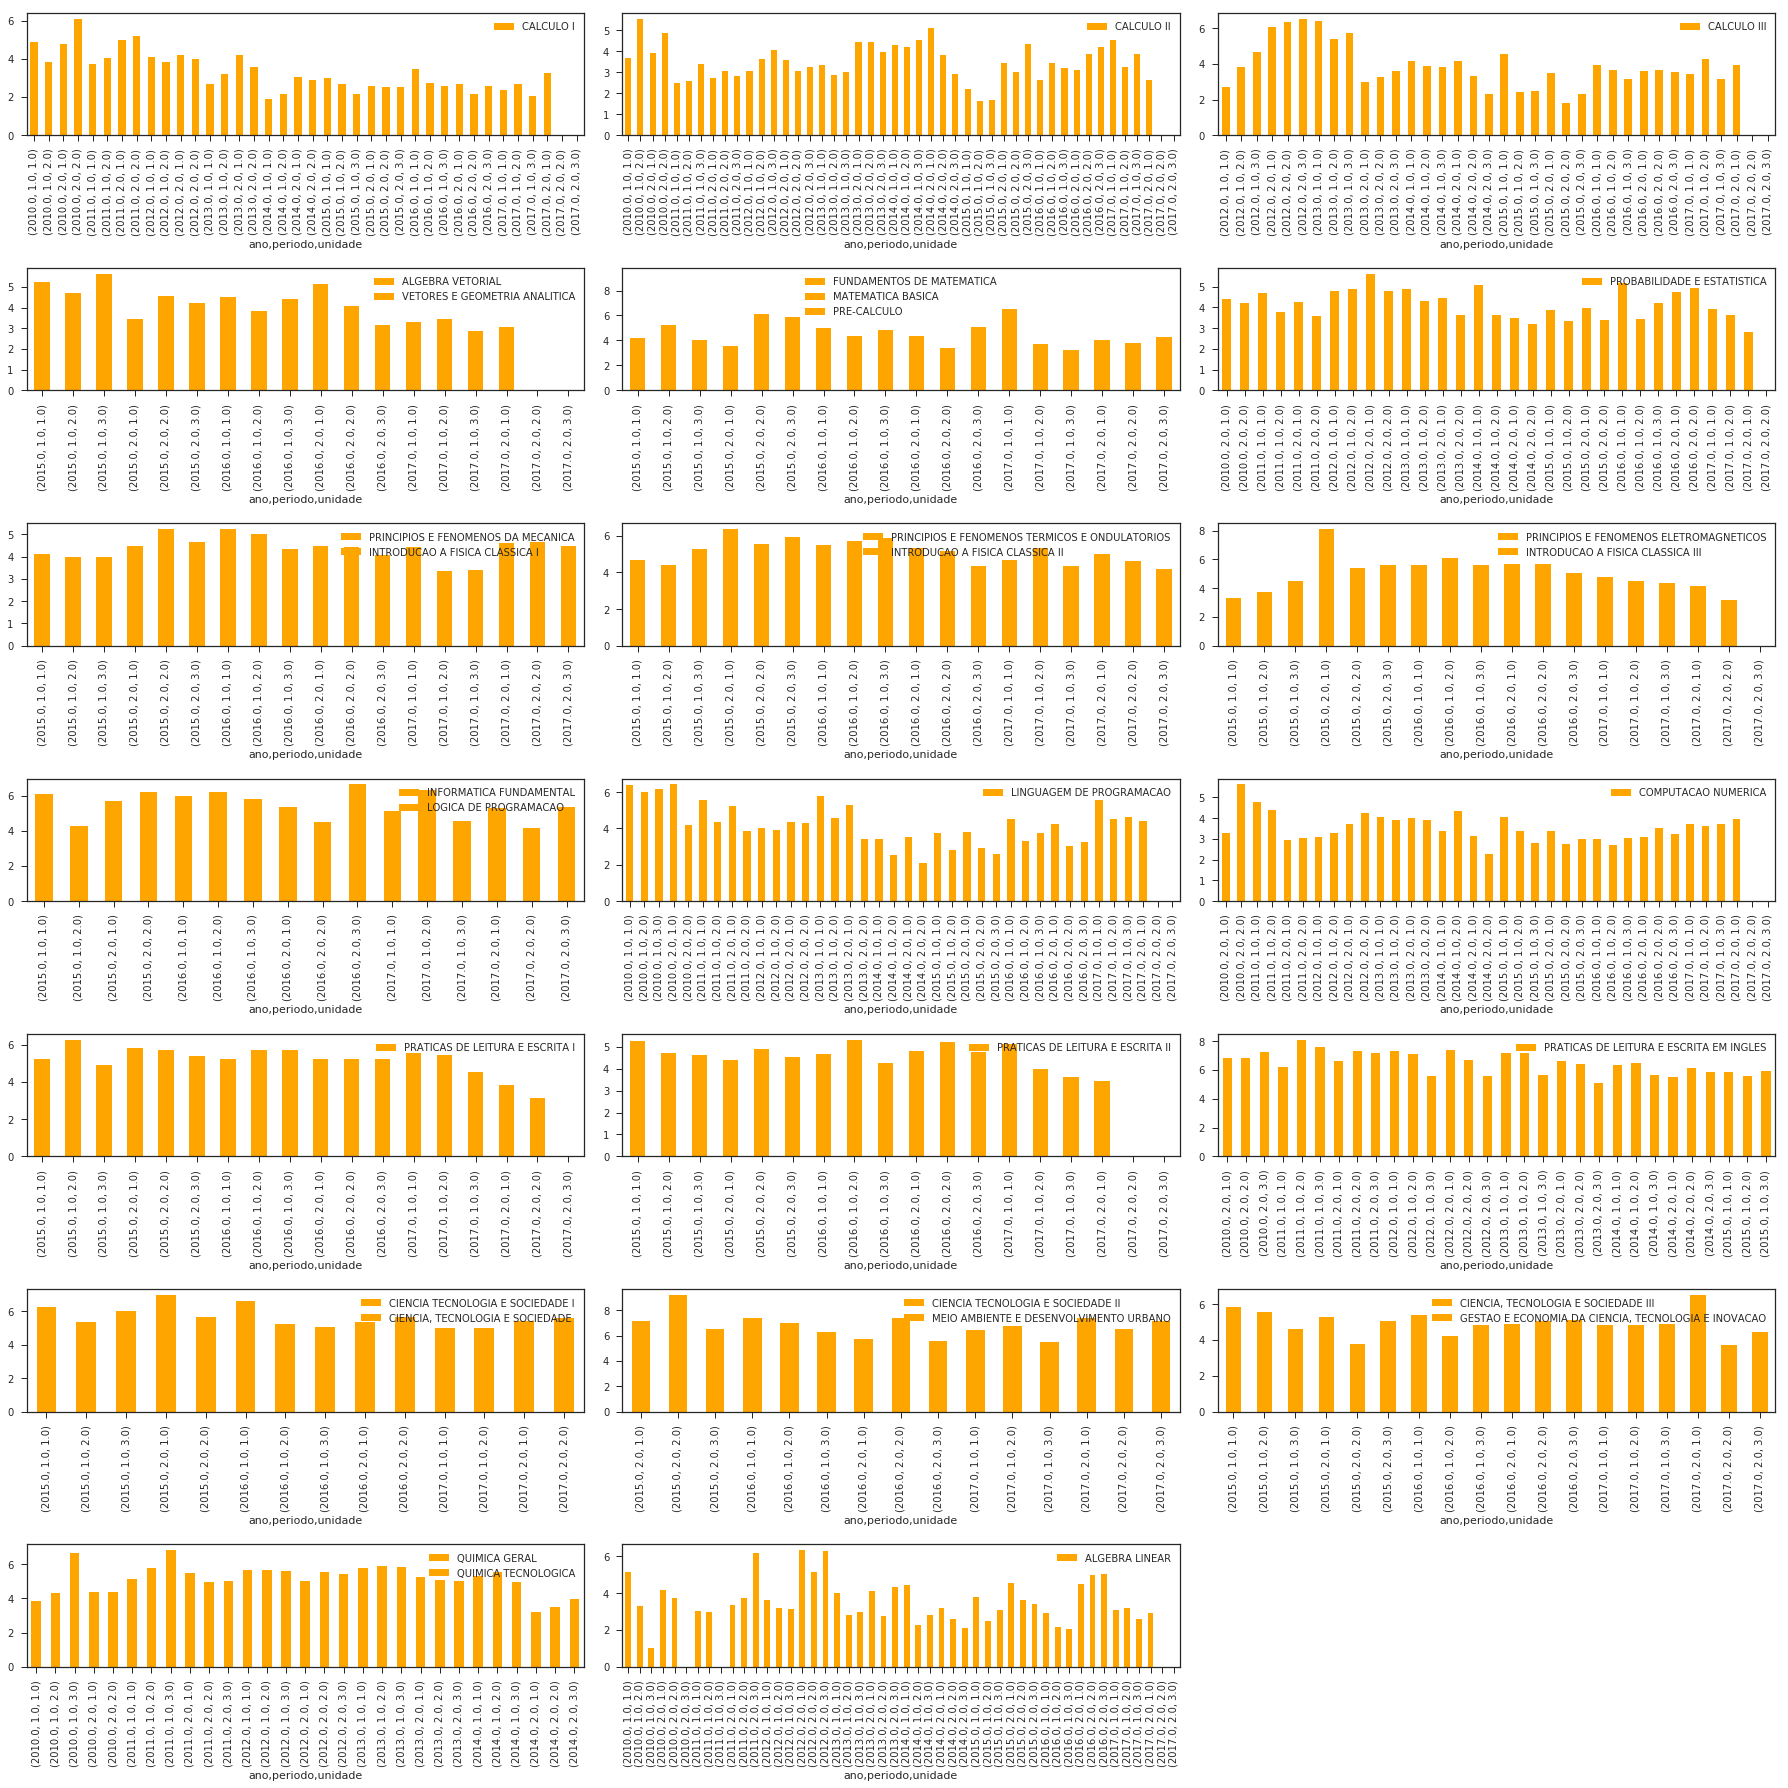

In [96]:
cont= 1
plt.ion()
fig= plt.figure(figsize=(25,25))

for d in disciplinas:
    fig.add_subplot(7,3,cont)
    cont+=1
    for r in d:
        a=df_matTurm[df_matTurm.nome_ascii==r].groupby(['ano','periodo','unidade']).nota.mean()
        a.plot.bar(label=r, color='orange')
        plt.legend()
    plt.plot(lx,ly, alpha=0.5)
    
plt.tight_layout()
plt.savefig('unidades.png')
plt.show()

## Períodos

In [97]:
# ordenando a ocorrencia das matriculas
df_ordenado = df_matTurm.sort_values(['discente','ano','periodo'])

df_ordenado['ano'] = df_ordenado.ano.astype(int)
df_ordenado['periodo'] = df_ordenado.periodo.astype(int)

In [98]:
# concatenando ano+periodo
df_ordenado['anoperiodo'] = (df_ordenado['ano'].map(str)+df_ordenado['periodo'].map(str))

In [99]:
# quantidade de periodos
agrupando_anoperiodo = pd.DataFrame(df_ordenado.groupby('discente').anoperiodo.unique())

In [100]:
agrupando_anoperiodo.head()

,anoperiodo
discente,
0004f23716a0a9743b48969a5db7970f,"[20142, 20151, 20152, 20161, 20162, 20171, 20172]"
0005a138027eba573d7f9894f5721188,"[20101, 20102, 20111, 20112, 20121, 20122, 201..."
0010d23e6ba908d137551ca5a405d99b,"[20102, 20111, 20112, 20121]"
0011d937400892a7b7d9eb50ef1b077a,"[20102, 20111, 20112, 20121, 20122, 20131, 201..."
001762207213316e810c2c80e3c2a3e9,"[20152, 20161]"


In [101]:
ocorrencias = agrupando_anoperiodo['anoperiodo'].map(len)
type(ocorrencias)

pandas.core.series.Series

In [102]:
ocorrencias.head()

discente
0004f23716a0a9743b48969a5db7970f    7
0005a138027eba573d7f9894f5721188    8
0010d23e6ba908d137551ca5a405d99b    4
0011d937400892a7b7d9eb50ef1b077a    8
001762207213316e810c2c80e3c2a3e9    2
Name: anoperiodo, dtype: int64

In [103]:
df_periodos = pd.DataFrame(df_ordenado.groupby('discente').last())

In [104]:
df_periodos['tempo'] = ocorrencias

In [105]:
df_periodos.head()

,descricao,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade,nome_ascii,id_docente_interno,ano,periodo,codigo_turma,descricao_horario,id_componente_curricular,anoperiodo,tempo
discente,,,,,,,,,,,,,,,,,,
0004f23716a0a9743b48969a5db7970f,MATRICULADO,0.0,10320810.0,57605931,2.0,6.0,0.0,f,1.0,COMPUTACAO NUMERICA,5753852.0,2017,2,01D,"35M12 (24/07/2017 - 09/09/2017), 35M12 4T34 (...",57599.0,20172,7
0005a138027eba573d7f9894f5721188,APROVADO POR NOTA,0.0,10320810.0,1237492,6.8,5.0,4.0,f,3.0,DINAMICA,5752035.0,2014,2,03,34M56 (21/07/2014 - 06/12/2014),52449.0,20142,8
0010d23e6ba908d137551ca5a405d99b,REPROVADO POR MÉDIA E POR FALTAS,0.0,10320810.0,1180031,0.9,0.0,28.0,f,3.0,CALCULO DIFERENCIAL E INTEGRAL II,25966.0,2012,1,04,246T12,23587.0,20121,4
0011d937400892a7b7d9eb50ef1b077a,APROVADO,0.0,10320810.0,1224833,5.6,4.6,14.0,f,3.0,ANALISE ECONOMICA DE PROJETOS,5753644.0,2014,1,01,34T56,41242.0,20141,8
001762207213316e810c2c80e3c2a3e9,CANCELADO,0.0,10320810.0,57579476,2.0,0.0,36.0,f,3.0,MATEMATICA DISCRETA,5757700.0,2016,1,01,3T12 5T56,40106.0,20161,2


In [106]:
df_periodos.groupby('ano').tempo.value_counts()

ano   tempo
2010  1         89
      2         62
2011  3         74
      2         63
      1         47
      4         45
2012  5        203
      6        147
      4        110
      2         95
      3         94
      1         72
2013  1        215
      7        183
      6        131
      8         93
      2         80
      5         77
      4         74
      3         71
2014  1        318
      7        137
      6        135
      2        132
      8        124
      9        123
      3        101
      4         97
      5         81
      10        51
              ... 
2016  1        393
      7        171
      8        170
      6        168
      4        142
      9        128
      2        120
      3        117
      5        109
      10        87
      11        72
      12        54
      13        29
      14         5
2017  1        934
      2        610
      3        519
      4        458
      6        364
      5        343
      7        324


Numéro de períodos cursados pelo discente


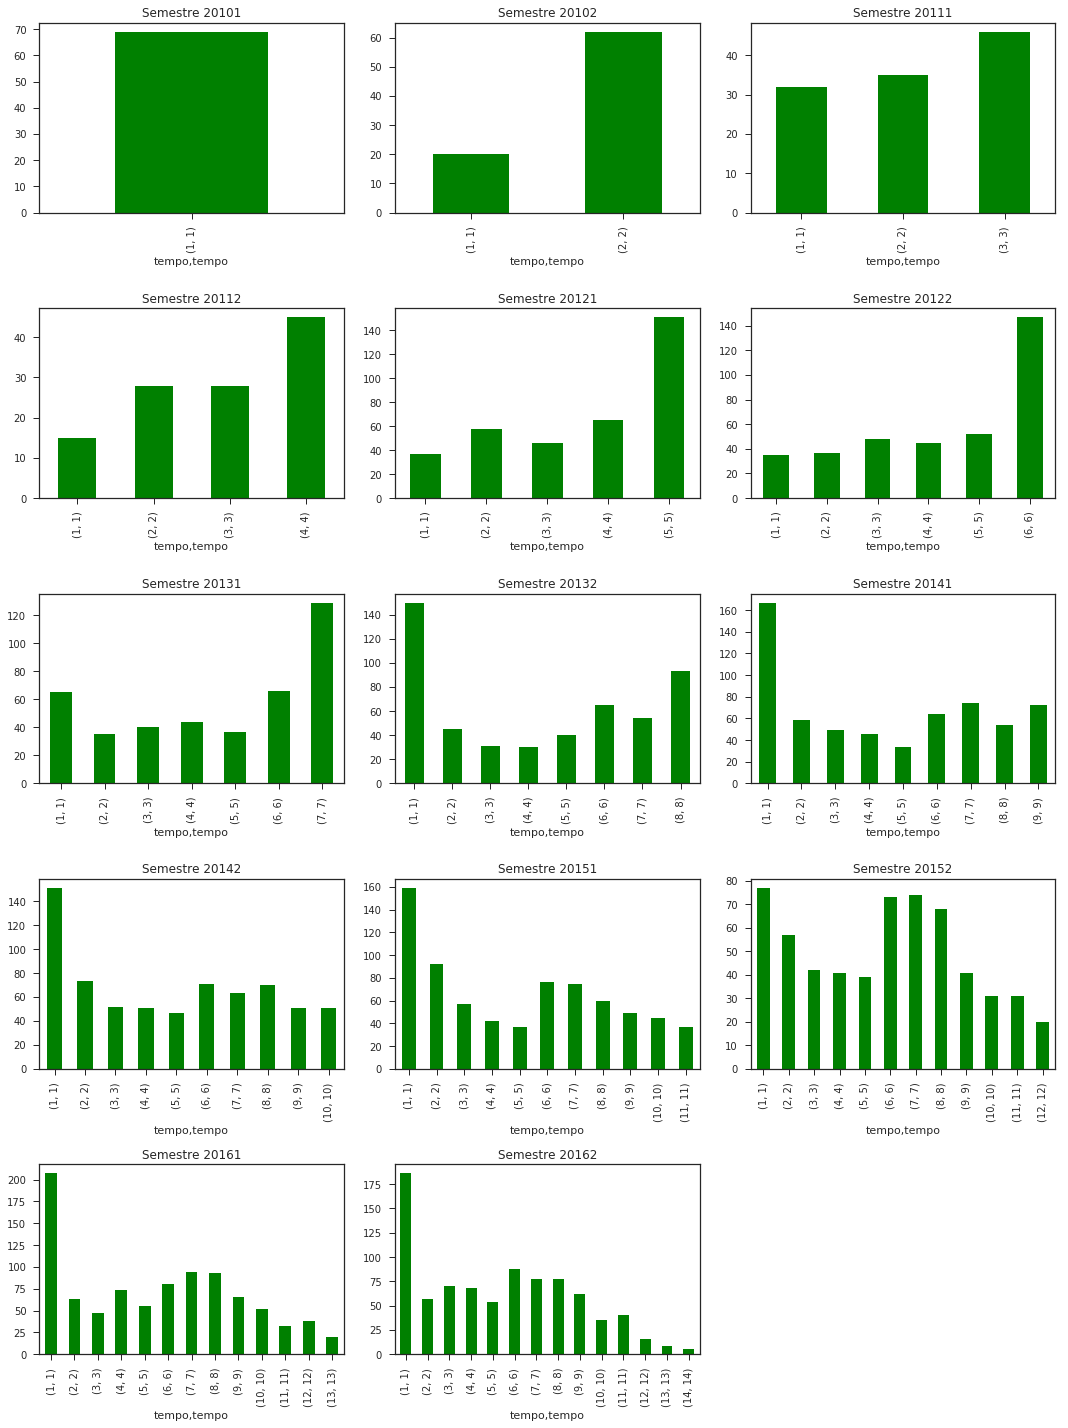

In [107]:
# grafico numero de periodos x ano
print('Numéro de períodos cursados pelo discente')

anos = ['20101', '20102', '20111', '20112', '20121', '20122', '20131', '20132', '20141', '20142', '20151', '20152', '20161', '20162']

cont = 1
plt.ion()
fig = plt.figure(figsize=(15,20))

for d in anos:
    fig.add_subplot(5,3,cont)
    cont+=1
    a=df_periodos[df_periodos.anoperiodo==d].groupby('tempo').tempo.value_counts()
    a.plot.bar(title='Semestre '+d, color='green')
    
plt.tight_layout()
plt.savefig('periodos.png')
plt.show()

## Reprovações

In [108]:
df_reprovados = df_matTurm[df_matTurm['descricao'] == 'REPROVADO']
aux =  df_matTurm[df_matTurm['descricao'] == 'REPROVADO POR MÉDIA E POR FALTAS']
# aux = df_matTurm[df_matTurm['descricao'] == 'REPROVADO POR FALTAS']
# df_reprovados = pd.concat([df_reprovados, aux])
df_reprovados = pd.concat([df_reprovados, aux])

df_aprovados = df_matTurm[df_matTurm['descricao'] == 'APROVADO']

print('Média das faltas dos discentes reprovados:')
print(df_reprovados['numero_total_faltas'].mean())
print()
print('Média das faltas dos alunos aprovados:')
print(df_aprovados['numero_total_faltas'].mean())

Média das faltas dos discentes reprovados:
12.708220935587867

Média das faltas dos alunos aprovados:
3.5246292340368064


In [109]:
repro_porano = pd.DataFrame(df_listaDisc.groupby(['nome_ascii','ano', 'periodo']).descricao.value_counts())
repro_porano.head(10)

descricao
nome_ascii     ano    periodo descricao                      
ALGEBRA LINEAR 2010.0 1.0     APROVADO                    412
                              REPROVADO                   217
                              TRANCADO                     40
                              CANCELADO                    27
                              DESISTENCIA                  15
                              REPROVADO POR FALTAS          6
                              EXCLUIDA                      2
                      2.0     REPROVADO                   476
                              APROVADO                    350
                              TRANCADO                    163

## Correlação da nota de ingresso com o IRA

In [110]:
# teste = pd.read_csv('data_science/componentes-curriculares-presenciais.csv', sep=';')

In [111]:
df_matTurm.columns

Index(['descricao', 'discente', 'faltas_unidade', 'id_curso', 'id_turma',
       'media_final', 'nota', 'numero_total_faltas', 'reposicao', 'unidade',
       'nome_ascii', 'id_docente_interno', 'ano', 'periodo', 'codigo_turma',
       'descricao_horario', 'id_componente_curricular'],
      dtype='object')

In [112]:
# pegando apenas as descrições que importam
list = ['APROVADO', 'REPROVADO', 'REPROVADO POR FALTAS',
        'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO POR NOTA',
        'REPROVADO POR NOTA', 'REPROVADO POR NOTA E FALTA']

df_notas = df_matTurm[df_matTurm['descricao'].isin(list)]

colunas_2 = ['descricao', 'discente', 'id_turma', 'media_final',
             'numero_total_faltas', 'reposicao', 'nome_ascii',
             'ano', 'periodo', 'codigo_turma', 'id_componente_curricular']

print(df_notas.shape)

df_notas = df_notas[colunas_2].drop_duplicates()

print(df_notas.shape)

# (1541565, 17)
# (255600, 12) com .dropna()

(1541565, 17)
(213642, 11)


In [113]:
pd.isnull(df_notas).sum()

descricao                   0
discente                    0
id_turma                    0
media_final                 1
numero_total_faltas         4
reposicao                   0
nome_ascii                  0
ano                         0
periodo                     0
codigo_turma                0
id_componente_curricular    0
dtype: int64

In [114]:
# Casos que acontece NaN
display(df_notas[df_notas.numero_total_faltas.isnull()])

# Preenchendo com zero
df_notas = df_notas.fillna(0)

,descricao,discente,id_turma,media_final,numero_total_faltas,reposicao,nome_ascii,ano,periodo,codigo_turma,id_componente_curricular
497271,REPROVADO,f1b1ae81b71aad5a4b152dc76ae3e40c,1183158,NaN,NaN,f,ALGEBRA LINEAR,2012.0,1.0,05,48583.0
867481,APROVADO,cd23a8ff372724934e5980a21d592105,1220094,5.2,NaN,f,MATEMATICA BASICA,2014.0,1.0,04A,48580.0
990145,APROVADO,3ed47c75988183895c5b3044426a2cf1,1220142,6.1,NaN,f,CALCULO I,2014.0,1.0,03A,48582.0
1086528,APROVADO,c244f604a11e255873c92eb43411401c,1229876,5.0,NaN,f,MATEMATICA BASICA,2014.0,2.0,06,48580.0


In [115]:
# dataset com as notas de ingresso
df_discentes = pd.read_csv('secret/matriculas-2013-2017.csv', sep=';')

colunas_1 = ['id_discente', 'forma_ingresso', 'ano_ingresso',
             'periodo_ingresso', 'cotista', 'nota_ingresso']

df_semNome = df_discentes[colunas_1]

# lista de discentes
series_discentes = df_semNome.id_discente.unique()

In [116]:
# calculo do IRA - falta a carga horária
# teste = df_notas[['ano', 'periodo']].apply(lambda x: str(x.ano)+str(x.periodo),axis=1)

## Teste com outros gráficos

In [117]:
df_notas.descricao.unique()

array(['APROVADO', 'REPROVADO', 'REPROVADO POR FALTAS',
       'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO POR NOTA',
       'REPROVADO POR NOTA', 'REPROVADO POR NOTA E FALTA'], dtype=object)

[(0, 10)]

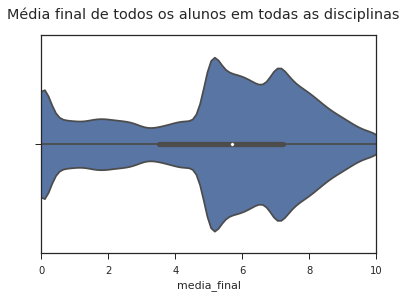

In [118]:
fig = plt.figure()
fig.suptitle('Média final de todos os alunos em todas as disciplinas')
graf = sns.violinplot(df_notas['media_final'])
graf.set(xlim=(0, 10))

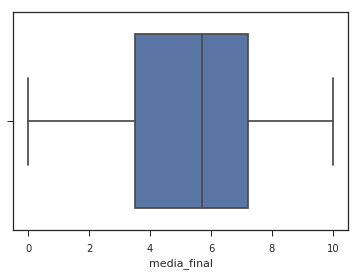

In [119]:
# fig = plt.figure()
# fig.suptitle('Título')
graf_1 = sns.boxplot(df_notas['media_final'])
# sns.swarmplot(df_notas['media_final'], size=2, color=".3", linewidth=0)
# graf.set(xlim=(0, 10))

## Testes

In [ ]:
%%timeit
teste = (df_ordenado['ano'].map(str)+df_ordenado['periodo'].map(str))
# teste.head()

1.51 s ± 27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# %%timeit
coisa = df_ordenado[['ano', 'periodo']].apply(lambda x: str(x.ano)+str(x.periodo),axis=1)
# coisa.head()

In [ ]:
%%timeit
x = [str(a1)+str(b1) for a1,b1 in zip(df_ordenado['ano'],df_ordenado['periodo'])]

1.59 s ± 30.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
